# Iris 분류문제 풀기 : Logistic Regression

https://en.wikipedia.org/wiki/Iris_flower_data_set

http://datascienceschool.net 

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Logistic Regression을 이용한 분류방법 정리

### 1. Hypothesis

로지스틱 회귀분석은 조건부 확률모형에서도 판별모형에 속함. 즉, 직접 조건부 확률함수를 추정하여 확률을 계산한다.

로지스틱(Logistic) 회귀분석은 그 명칭과 달리 회귀분석 문제와 분류 문제 모두에 사용할 수 있다. 로지스틱 회귀 모형에서는 종속변수가 이항 분포를 따르고 그 모수(parameter) $\theta$가 독립 변수 $x$에 의존한다고 가정한다.

$$ p(y \mid x) = \text{Bin} (y \mid N, \theta(x) )$$

식에서 보듯이 로지스틱 함수는 y의 값이 특정한 구간내의 값($0 \sim N$)만 가질 수 있기 때문에 종속변수가 이러한 특성을 가진 경우에 회귀분석 방법으로 쓸 수 있다.  

또는 이항 분포의 특별한 경우로서 베르누이 확률 변수도 가능하다.

$$ p(y \mid x) = \text{Bern} (y \mid  \theta(x) )$$

로지스틱 회귀분석은 다음과 같은 경우에 적용할 수 있다.

(1) 종속변수 $y$가 0부터 1까지 막혀있는 경우의 회귀분석 문제

$$ \hat{y} = \theta(x) $$
만약 y의 범위가 0부터 1이 아니면 스케일링을 통해 바꿀 수 있다.

(2) 종속변수 $y$가 0또는 1인 분류 문제

$$ \hat{y} = \begin{cases} 1 & \text{ if } \theta(x) \geq 0.5 \\ 0 & \text{ if } \theta(x) < 0.5 \end{cases} $$

모수 $\theta$ 는 x의 함수이다. 함수의 형태는 x의 선형 함수를 기반으로 0부터 1사이의 값만 나올 수 있도록 시그모이드 함수라는 것을 사용하여 변형되었다.

$$
\theta = f(w^Tx)
$$


모수 $\theta$는 일반적인 회귀분석의 종속 변수와 달리 0 부터 1까지의 실수값만 가질 수 있기 때문에 시그모이드 함수(sigmoid function)이라 불리는 특별한 형태의 함수 $f$를 사용해야 한다. 시그모이드 함수는 종속 변수의 모든 실수 값에 대해 유한한 구간 $(a,b)$ 사이의 한정된(bounded) 값과 양의 기울기를 가지는 함수를 말하며 여기서는 로지스틱 함수에 대해서만 정리해둔다.

 * 로지스틱 함수 (Logistic Function) 
 
$$ \text{logitstic}(z) = \dfrac{1}{1+\exp{(-z)}} $$

로지스틱 모형은 일종의 비선형 회귀 모형이지만 다음과 같이 MLE(Maximum Likelihood Estimation) 방법으로 모수 $w$를 추정할 수 있다.

여기에서는 종속 변수 $y$가 베르누이 확률 변수라고 가정한다.

$$ p(y \mid x) = \text{Bern} (y \mid  \theta(x;w) )$$

$\theta$가 로지스틱 함수 형태로 표현된다면

$$
\theta(x;w) = \dfrac{1}{1 + \exp{(-w^Tx)}}
$$

Likelihood는 다음과 같이 표현된다.(Likelihood와 확률밀도함수(pdf)는 무엇을 상수, 변수로 보느냐 하는 관점의 차이!)

데이터 표본이 ${(x_i, y_i)_{1:N}}$ 일 경우 N번의 반복 시행으로 표본 데이터가 모두 독립이므로 전체 확률 밀도 함수는 각각의 확률 밀도 함수의 곱과 같다.

$$ p(y \mid x) = \text{Bern} (y \mid  \theta(x;w) ) = \prod_{i=1}^N \theta_i(x_i;w)^{y_i} (1-\theta_i(x_i;w))^{1-y_i} 
$$

### 2. Cost function

모수 추정(결국 w를 추정하는 것)은 MLE(Maximum Likelihood Estimation) 방식으로!

Maximum Likelihood를 구하기 위해서는 계산의 편의를 위해 Likelihood에 로그를 취한 후 w에 대해 편미분하여 gradient가 0이 되는 w값을 구한다.

즉, Log Likelihood의 w에 대한 편미분이 cost function이 된다.

$$ 
\begin{eqnarray}
\dfrac{\partial \text{LL}}{\partial w} 
&=& \sum_{i=1}^N \left( y_i \dfrac{1}{\theta_i(x_i;w)} - (1-y_i)\dfrac{1}{1-\theta_i(x_i;w)} \right) \dfrac{\partial \theta}{\partial w}  \\
&=& \sum_{i=1}^N \big( y_i (1-\theta_i(x_i;w)) - (1-y_i)\theta_i(x_i;w)  \big)  x_i \\
&=& \sum_{i=1}^N \big( y_i  - \theta_i(x_i;w) \big) x_i \\
\end{eqnarray}
$$


### 3. 수치적 최적화

w에 대한 비선형 함수이므로 최적의 모수 w는 gradient decent 방법을 이용해 수치적으로 구해야 한다.

In [55]:
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

In [56]:
iris = load_iris()
X = iris.data
y = iris.target

In [57]:
model1 = LogisticRegression().fit(X, y)

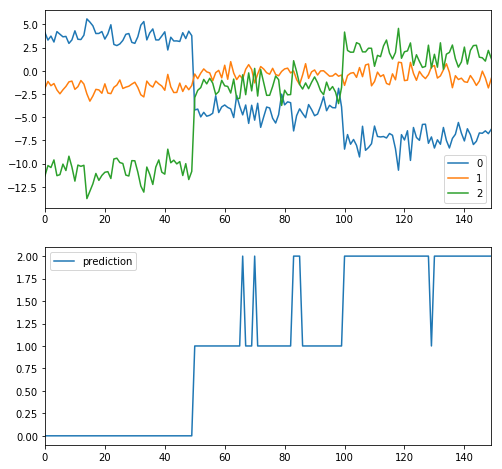

In [58]:
plt.figure(figsize=(8, 8))
ax1 = plt.subplot(211)
pd.DataFrame(model1.decision_function(X)).plot(ax=ax1)
ax2 = plt.subplot(212)
yhat1 = model1.predict(X)
pd.DataFrame(yhat1, columns=["prediction"]).plot(ax=ax2)
plt.show()

In [59]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve

In [60]:
confusion_matrix(y, yhat1)

array([[50,  0,  0],
       [ 0, 45,  5],
       [ 0,  1, 49]])

In [61]:
print(classification_report(y, yhat1))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.98      0.90      0.94        50
          2       0.91      0.98      0.94        50

avg / total       0.96      0.96      0.96       150



In [62]:
from sklearn.preprocessing import label_binarize
y_multi = label_binarize(y, classes=[0, 1, 2])
d1_multi = model1.decision_function(X) 

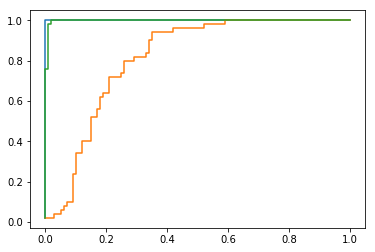

In [63]:
fpr10, tpr10, thresholds10 = roc_curve(y_multi[:, 0], d1_multi[:, 0]) # 첫 50개 샘플(실제 카테고리 0)
fpr11, tpr11, thresholds11 = roc_curve(y_multi[:, 1], d1_multi[:, 1]) # 다음 50개 샘플 (실제 카테고리 1)
fpr12, tpr12, thresholds12 = roc_curve(y_multi[:, 2], d1_multi[:, 2]) # 마지막 50개 샘플 (실제 카테고리 2)
plt.plot(fpr10, tpr10, label="class 0")
plt.plot(fpr11, tpr11, label="class 1")
plt.plot(fpr12, tpr12, label="class 2")
plt.show()

In [64]:
model2 = OneVsRestClassifier(LogisticRegression()).fit(X, y)
model3 = OneVsOneClassifier(LogisticRegression()).fit(X, y)